In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import cv2
import numpy as np
import os
from imutils import paths

In [3]:
images = "C:\\Users\\nisha\Desktop\\[KNEE OSTEOARTHRITIS]\\data 2\\Osteoarthritis Dataset\\train"

In [4]:
folders = os.listdir(images)
print(folders)

['Normal', 'Osteoarthritis']


In [5]:
image_data= []
labels = []

In [6]:
label_dict = {
    'Normal':0,
    'Osteoarthritis':1
}

In [7]:
from keras.preprocessing import image

for ix in folders:
  path = os.path.join(images,ix)
  for im in os.listdir(path):
    img = image.load_img(os.path.join(path,im),target_size=((512,512)))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    labels.append(label_dict[ix])

In [8]:
print(len(image_data),len(labels))

2350 2350


In [9]:
combined = list(zip(image_data,labels))
image_data[:],labels[:] = zip(*combined)

In [10]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [11]:
x_train = np.array(image_data)
y_train = np.array(labels)

print(x_train.shape,y_train.shape)

(2350, 512, 512, 3) (2350,)


In [12]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
print(x_train.shape,y_train.shape)

(2350, 512, 512, 3) (2350, 2)


In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
# Data Augmentation
augment = ImageDataGenerator( 
                             rotation_range=20,
                              width_shift_range=0.01, 
                              height_shift_range=0.01, 
                              horizontal_flip=False, 
                              vertical_flip=False,
                            )
augment.fit(x_train)

In [15]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

In [16]:
#CNN MODEL
model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
filepath="osteoarthritis_detection.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=3)
callbacks_list = [checkpoint]

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 255, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 253, 253, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        3

In [18]:
hist = model.fit(x_train,y_train,       
                    shuffle = True,
                    batch_size=32,
                    epochs = 30,
                    validation_split = 0.10,callbacks=callbacks_list) # model Training

Epoch 1/30
67/67 [==============================] - ETA: 0s - loss: 3.7906 - accuracy: 0.5995
Epoch 00001: val_loss improved from inf to 2.00758, saving model to osteoarthritis_detection.hdf5
67/67 [==============================] - 157s 2s/step - loss: 3.7906 - accuracy: 0.5995 - val_loss: 2.0076 - val_accuracy: 1.0000
Epoch 2/30
67/67 [==============================] - ETA: 0s - loss: 2.1930 - accuracy: 0.6095
Epoch 00002: val_loss improved from 2.00758 to 1.61698, saving model to osteoarthritis_detection.hdf5
67/67 [==============================] - 167s 2s/step - loss: 2.1930 - accuracy: 0.6095 - val_loss: 1.6170 - val_accuracy: 1.0000
Epoch 3/30
67/67 [==============================] - ETA: 0s - loss: 1.9617 - accuracy: 0.6165
Epoch 00003: val_loss improved from 1.61698 to 1.42819, saving model to osteoarthritis_detection.hdf5
67/67 [==============================] - 177s 3s/step - loss: 1.9617 - accuracy: 0.6165 - val_loss: 1.4282 - val_accuracy: 1.0000
Epoch 4/30
67/67 [========

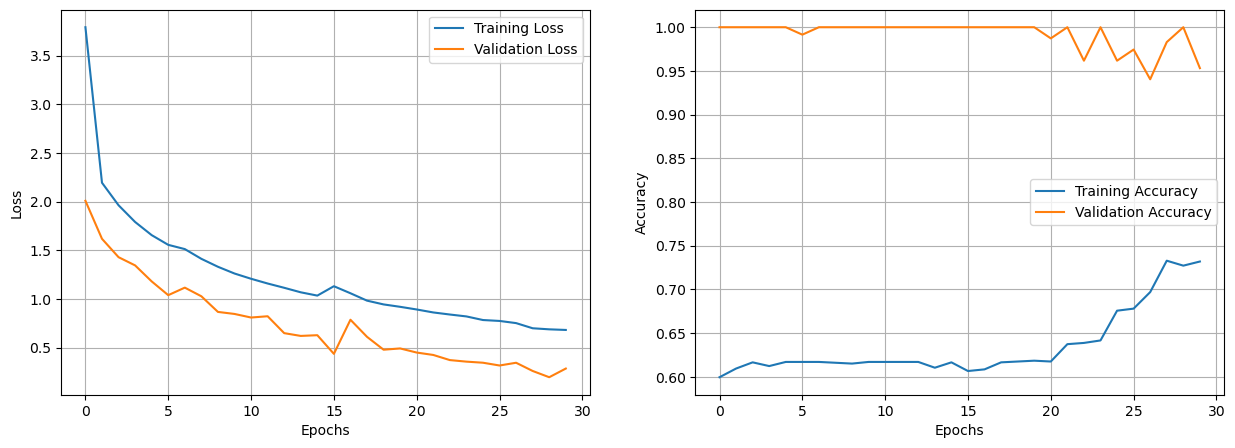

In [19]:
from matplotlib import pyplot as plt
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()
plt.savefig("Figure 2 updated.jpg")

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()
plt.savefig("figure 3 updated.jpg")

In [20]:
model.evaluate(x_train,y_train)

74/74 [==============================] - 40s 545ms/step - loss: 0.6175 - accuracy: 0.7604


[0.6175102591514587, 0.7604255080223083]

In [21]:
#TESTING THE cnn MODEL'S PERFORMANCE
test_images = "C:\\Users\\nisha\\Desktop\\[KNEE OSTEOARTHRITIS]\\data 2\\Osteoarthritis Dataset\\valid"

test_image_data = []
test_labels = []

test_folders = os.listdir(test_images)
print(test_folders)

label_dict = {
    'Normal':0,
    'Osteoarthritis':1
}

from keras.preprocessing import image

for ix in test_folders:
    path = os.path.join(test_images,ix)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size = ((512,512)))
        img_array = image.img_to_array(img)
        test_image_data.append(img_array)
        test_labels.append(label_dict[ix])
        

combined = list(zip(test_image_data,test_labels))
test_image_data[:],test_labels[:] = zip(*combined)

x_test = np.array(test_image_data)
y_test = np.array(test_labels)

from keras.utils import np_utils

y_test = np_utils.to_categorical(y_test)
print(x_test.shape,y_test.shape)

['Normal', 'Osteoarthritis']
(641, 512, 512, 3) (641, 2)


In [22]:
model.evaluate(x_test,y_test)

21/21 [==============================] - 13s 615ms/step - loss: 0.5784 - accuracy: 0.8144


[0.5784075260162354, 0.8143525719642639]

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
predictions = model.predict(x_test, batch_size = 32)
pred = np.argmax(predictions, axis=1)

In [25]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       210
           1       0.87      0.85      0.86       431

    accuracy                           0.81       641
   macro avg       0.79      0.79      0.79       641
weighted avg       0.82      0.81      0.82       641



In [26]:
print(confusion_matrix(test_labels, pred))

[[154  56]
 [ 63 368]]


Normalized Confusion Matrix: 
[[0.73 0.27]
 [0.15 0.85]]


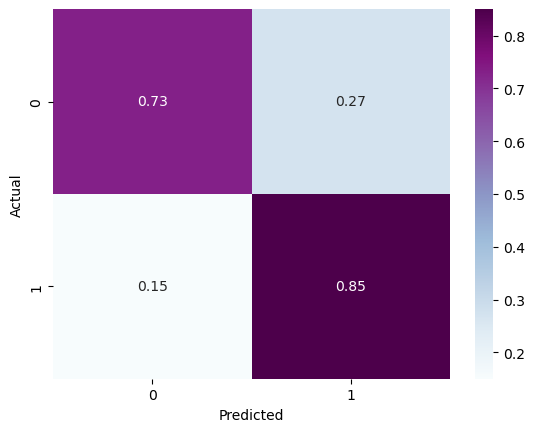

In [27]:
# Normalized Confusion Matrix
import numpy as np
import seaborn as sns
print("Normalized Confusion Matrix: ")
cm_normalized = np.round(confusion_matrix(test_labels, pred)/np.sum(confusion_matrix(test_labels, pred), axis = 1).reshape(-1, 1),2)
print(cm_normalized)
sns.heatmap(cm_normalized, annot = True, cmap = "BuPu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
sensitivity1 = confusion_matrix(test_labels, pred)[0,0]/(confusion_matrix(test_labels, pred)[0,0]+confusion_matrix(test_labels, pred)[0,1])
print('Sensitivity : ', sensitivity1 )

Sensitivity :  0.7333333333333333


In [29]:
specificity1 = confusion_matrix(test_labels, pred)[1,1]/(confusion_matrix(test_labels, pred)[1,0]+confusion_matrix(test_labels, pred)[1,1])
print('Specificity : ', specificity1)

Specificity :  0.8538283062645011


In [33]:
model.save("osteoarthritis_detection.hd5")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: osteoarthritis_detection.hd5\assets


In [63]:
loaded_model = tf.keras.models.load_model('osteoarthritis_detection.hd5')

In [64]:
model.summary()# final model developed 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 255, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 253, 253, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        3

In [69]:
import os
import datetime
import random
import statistics as stat
from pathlib import Path
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from imutils import paths

Prediction: Osteoarthritis


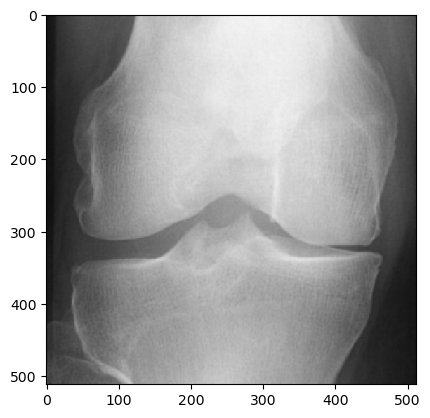

In [101]:
img = image.load_img('C:\\Users\\nisha\\Desktop\\[KNEE OSTEOARTHRITIS]\\data 2\\Osteoarthritis Dataset\\test\\Osteoarthritis\\9340855_1.png', target_size=(512, 512)) #insert a random covid-19 x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
    print('Prediction: Osteoarthritis')
else:
    print('Prediction: Osteoarthritis')